***
## [October 2018] - Acceptance measurements to check alignment
### Abstract:
With SPECTRA we can simulate what the fundamental and harmonic lineshapes should look like as a function of acceptance.

We can also do these simulations with the aperture deliberately off-axis.

Can we compare these calculations with measured data to evaluate whether we are aligned to the undulator axis?
***

In [1]:
from BLOCH_beamline import *
import matplotlib.patches as patches

data_folder = Path('Data/')
calculation_folder = Path('SPECTRA_calculations/')

%matplotlib inline
font = {'size'   : 14}
matplotlib.rc('font', **font)

---- BLOCH beamline ----
	Last updated 27.11.2018 

	Latest change: better HDF5 handling



***

## Measurement details

|Electrometer channel|Measurement|
|-|-|
| b110a_ctl_em02_ch03 |Current at the M4 photodiode|

|Beamline parameter | Setting |
|-|-|
| Ring current | 200mA|
| EPU (gap, phase) | (50, 0)|
| F.E. mm(1x,2x, 1y, 2y) | (-2.49, -5.58, -3.2, -5) |
| F.E. gap (x,y) | (-8.07, -8.2) |
| F.E. offset (x,y) | (1.55, 0.9) |
| M1 (pitch,lateral) | (-1760, ???) |
| Mono baffle gap (h, v) |**Swept**|
| Mono baffle offset (h, v) | (-0.2,0.7)|
| M3 baffle gap (h, v) | (?,?)|
| Exit slit gap (h, v) | (130um, 1200um) |
| M4 baffle gap (h, v) | (?,?)|


**undu_mono_scan3.h5**

| Scan | Mono baffle (hgap,vgap) | (h,v) acceptance ($\sigma$) |
|-|-|-|
| 1333 | (4.0,4.5) | 0.48,0.48| 
| 1334 | (5.0,5.5) | 0.95,0.95|
| 1335 | (6.0,6.5) | 1.43, 1.43|
| 1336 | (7.0,7.5) | 1.91, 1.91|




***

## Calculation details

| Parameter | Value |
|-|-|
|Program | SPECTRA 10.1|
|Mode | Near field>energy dependence>partial flux|
|Field data|Gap50_HP_BxBy_Scan7c.txt|
|Parameter file |84.prm\*|

\*current reduced to 200mA


| Folder | Filename | $\Delta$qx,y (mrad) | acceptance (1$\sigma$=0.15mrad) | qx,y (mrad) |
|-|-|-|-|-|
|a| a-1 | 0.072 | 0.48 |0 |
|a| a-2 | 0.145 | 0.97 |0 |
|a| a-3 | 0.218 | 1.45 |0 |
|a| a-4 | 0.291 | 1.94 |0 |
|a| a-5 | 0.364 | 2.43 |0 |
|a| a-6 | 0.437 | 2.91 |0 |
|a| a-7 | 0.510 | 3.40 |0 |
|-|-|-|-|-|
|b| b-1 .. b-7 | as above | as above |(0.075,0) |
|c| c-1 .. c-7 | as above | as above |(0.15,0) |
|d| b-1 .. b-7 | as above | as above |(0.0,0.075) |
|e| c-1 .. c-7 | as above | as above |(0,0.15) |
<img src="images/SPECTRA_slit_terminology.jpeg" width="200px"/>

Note conventions: SPECTRA treats the slit width (dx) or equivalent angular width (dq) the same way as we consider acceptance: it's the full angle, not just angle to the beam central axis

| image (.dta) | EPU gap | Source distance | Energy | Comment |
|-|-|-|-|-|
| im01 | 50mm| 14m | 85 | |
| im02 | 50mm| 14m | 83 | |
| im03 | 50mm| 14m | 81 | |
| im04 | 50mm| 14m | 79 | |

***
## Calculation results:

In [2]:
calculation_folder = Path('SPECTRA_calculations/a/')
entries = [1,2,3,4,5,6,7]
calculationSet_onaxis = [(loadSPECTRACalc(calculation_folder/"a-{0}.dc0".format(entryNumber))) for entryNumber in entries]

calculation_folder = Path('SPECTRA_calculations/b/')
calculationSet_offaxis_horizontally  = [(loadSPECTRACalc(calculation_folder/"b-{0}.dc0".format(entryNumber))) for entryNumber in entries]

calculation_folder = Path('SPECTRA_calculations/c/')
calculationSet_veryoffaxis_horizontally  = [(loadSPECTRACalc(calculation_folder/"c-{0}.dc0".format(entryNumber))) for entryNumber in entries]

calculation_folder = Path('SPECTRA_calculations/d/')
calculationSet_offaxis_vertically  = [(loadSPECTRACalc(calculation_folder/"d-{0}.dc0".format(entryNumber))) for entryNumber in entries]

calculation_folder = Path('SPECTRA_calculations/e/')
calculationSet_veryoffaxis_vertically  = [(loadSPECTRACalc(calculation_folder/"e-{0}.dc0".format(entryNumber))) for entryNumber in entries]


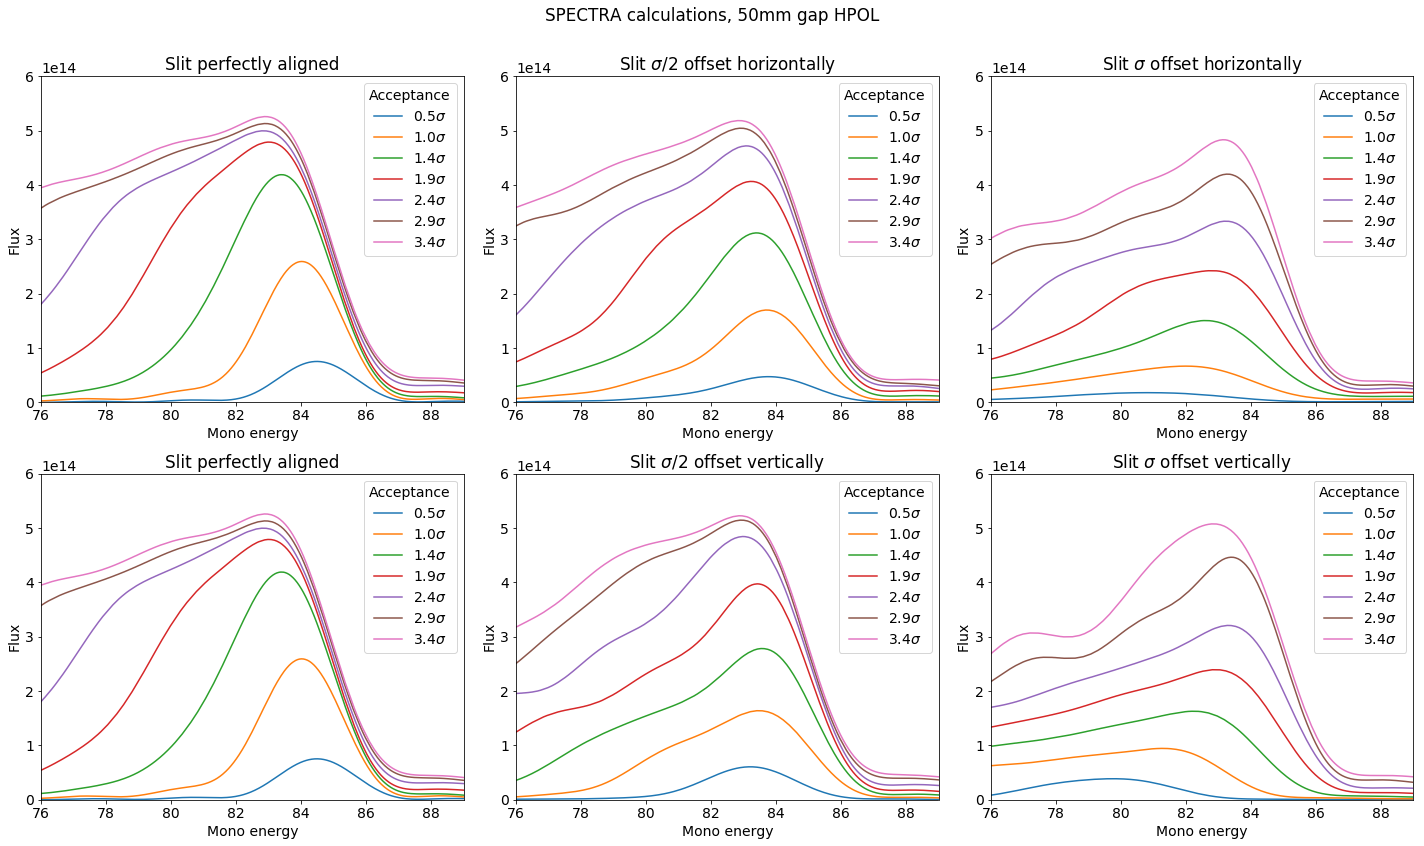

In [3]:
fig=plt.figure(figsize=(20,12))
fig.suptitle('SPECTRA calculations, 50mm gap HPOL')
acceptance = [0.5,1.0,1.4,1.9,2.4,2.9,3.4]

scanSets = [calculationSet_onaxis, calculationSet_offaxis_horizontally,calculationSet_veryoffaxis_horizontally]
subplot_titles = ["Slit perfectly aligned","Slit $\sigma$/2 offset horizontally","Slit $\sigma$ offset horizontally"]
for subplot_index in range(1,4):
    plt.subplot(2, 3, subplot_index)
    for index,scan in enumerate(scanSets[subplot_index-1]):
        plt.plot(scan['mono_energy'],scan['flux'],label="{0}$\sigma$".format(acceptance[index]))
    plt.ylabel('Flux')
    plt.legend(title="Acceptance")
    plt.xlabel('Mono energy')
    plt.title(subplot_titles[subplot_index-1])
    plt.xlim([76,89])
    plt.ylim([0,6e14])

scanSets = [calculationSet_onaxis, calculationSet_offaxis_vertically,calculationSet_veryoffaxis_vertically]
subplot_titles = ["Slit perfectly aligned","Slit $\sigma$/2 offset vertically","Slit $\sigma$ offset vertically"]
for subplot_index in range(4,7):
    plt.subplot(2, 3, subplot_index)
    for index,scan in enumerate(scanSets[subplot_index-4]):
        plt.plot(scan['mono_energy'],scan['flux'],label="{0}$\sigma$".format(acceptance[index]))
    plt.ylabel('Flux')
    plt.legend(title="Acceptance")
    plt.xlabel('Mono energy')
    plt.title(subplot_titles[subplot_index-4])
    plt.xlim([76,89])
    plt.ylim([0,6e14])
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

These plots demonstrate the main idea here: That the lineshape of the fundamental peak (and it's evolution with increasing acceptance) depend on how well aligned you are to the undulator output axis. As you go off axis the lineshapes become asymmetric even for very small acceptance.

To understand why the plots evolve like this, and why the direction of misalignment matters, we can look at some spatial flux plots:

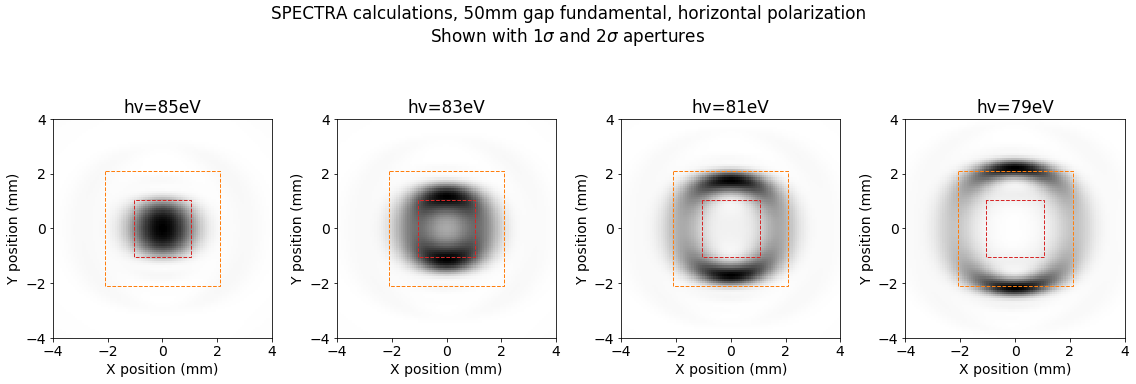

In [4]:

calculation_folder = Path('SPECTRA_calculations/')
im01,im01_extent=loadSPECTRA_image(calculation_folder/"im01.dta")
im02,im02_extent=loadSPECTRA_image(calculation_folder/"im02.dta")
im03,im03_extent=loadSPECTRA_image(calculation_folder/"im03.dta")
im04,im04_extent=loadSPECTRA_image(calculation_folder/"im04.dta")

fig=plt.figure(figsize=(16,6))
fig.suptitle('SPECTRA calculations, 50mm gap fundamental, horizontal polarization\nShown with 1$\sigma$ and 2$\sigma$ apertures')

hv = [85,83,81,79]

images = [im01,im02,im03,im04]
extents =[im01_extent,im02_extent,im03_extent,im04_extent]

for subplot_index in range(1,5):
    plt.subplot(1, 4, subplot_index)
    plt.imshow(images[subplot_index-1],aspect='auto',cmap='gray_r',extent=extents[subplot_index-1])
    one_sigma_aperture= patches.RegularPolygon((0, 0), numVertices=4, orientation=math.radians(45),radius=sqrt(2)*(2.1/2),linestyle='--',color='tab:red',fill=False)
    plt.gca().add_patch(one_sigma_aperture)
    two_sigma_aperture= patches.RegularPolygon((0, 0), numVertices=4, orientation=math.radians(45),radius=sqrt(2)*(4.2/2),linestyle='--',color='tab:orange',fill=False)
    plt.gca().add_patch(two_sigma_aperture)
    ax=plt.gca()
    ax.set_aspect(1)
    plt.xlabel('X position (mm)')
    plt.ylabel('Y position (mm)')
    plt.title("hv={0}eV".format(hv[subplot_index-1]))

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()   

### Experimental data:

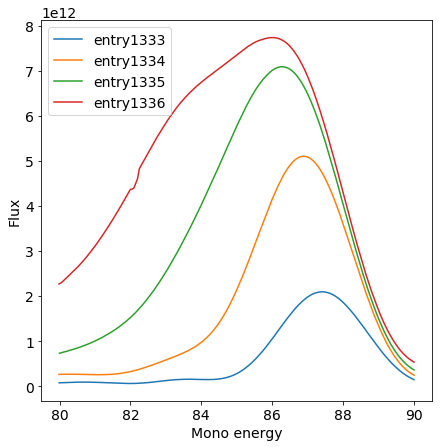

In [6]:
dataFile=data_folder/"undu_mono_scan3.h5"
entries = [1333,1334,1335,1336]
scanSet = []
for index,entryNumber in enumerate(entries):
    scanSet.append(HDF5loadscan(dataFile,entryNumber))
    scanSet[index]['diodeCurrent'] = [((ii*-1)/1000) for ii in scanSet[index]['b110a_ctl_em02_ch03']]
    scanSet[index]['flux'] = [currentToFlux(I,hv) for I,hv in zip(scanSet[index]['diodeCurrent'],scanSet[index]['mono_energy'])]


fig=plt.figure(figsize=(7,7))

for index,scan in enumerate(scanSet):
    plt.plot(scan['mono_energy'],scan['flux'],label="entry{0}".format(entries[index]))
    
plt.ylabel('Flux')
plt.legend()
plt.xlabel('Mono energy')
plt.show()

### Overlaid: (requires slight rescaling of energy axis!)

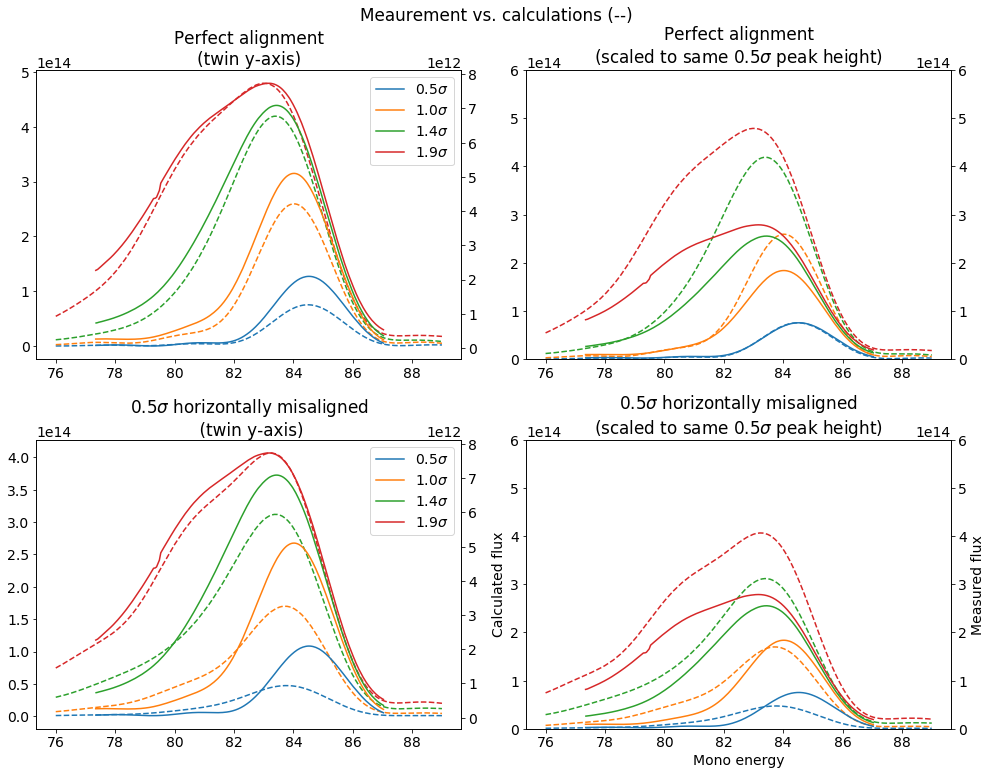

In [7]:
for index,scan in enumerate(scanSet):
    scan['mono_energy_corrected'] = [(n*0.967) for n in scan['mono_energy']]
    scan['flux_rescaled'] = [(75440000000000/2093358526853 * n) for n in scan['flux']]
    
fig=plt.figure(figsize=(14,11))
fig.suptitle('Meaurement vs. calculations (--)')
acceptance = [0.5,1.0,1.4,1.9]

calculation_subset_onaxis = calculationSet_onaxis[0:4]
calculationSet_subset_offaxis_horizontally=calculationSet_offaxis_horizontally[0:4]

subplot_titles = ["a","b"]

plt.subplot(2, 2, 1)
ax1 = plt.gca()
ax2 = ax1.twinx()
for index,scan in enumerate(calculation_subset_onaxis): ax1.plot(scan['mono_energy'],scan['flux'],linestyle='--')
for index,scan in enumerate(scanSet): ax2.plot(scan['mono_energy_corrected'],scan['flux'],label="{0}$\sigma$".format(acceptance[index]))  
plt.title('Perfect alignment\n(twin y-axis)')
plt.legend() 

plt.subplot(2, 2, 2)
ax1 = plt.gca()
ax2 = ax1.twinx()
for index,scan in enumerate(calculation_subset_onaxis): ax1.plot(scan['mono_energy'],scan['flux'],linestyle='--')
for index,scan in enumerate(scanSet): ax2.plot(scan['mono_energy_corrected'],scan['flux_rescaled'],label="{0}$\sigma$".format(acceptance[index]))  
plt.title('Perfect alignment\n(scaled to same 0.5$\sigma$ peak height)')
ax1.set_ylim([0,6e14])
ax2.set_ylim([0,6e14])

plt.subplot(2, 2, 3)
ax1 = plt.gca()
ax2 = ax1.twinx()
for index,scan in enumerate(calculationSet_subset_offaxis_horizontally): ax1.plot(scan['mono_energy'],scan['flux'],linestyle='--')
for index,scan in enumerate(scanSet): ax2.plot(scan['mono_energy_corrected'],scan['flux'],label="{0}$\sigma$".format(acceptance[index]))  
plt.title('0.5$\sigma$ horizontally misaligned\n (twin y-axis)')
plt.legend() 

plt.subplot(2, 2, 4)
ax1 = plt.gca()
ax2 = ax1.twinx()
for index,scan in enumerate(calculationSet_subset_offaxis_horizontally): ax1.plot(scan['mono_energy'],scan['flux'],linestyle='--')
for index,scan in enumerate(scanSet): ax2.plot(scan['mono_energy_corrected'],scan['flux_rescaled'],label="{0}$\sigma$".format(acceptance[index]))  
plt.title('0.5$\sigma$ horizontally misaligned\n(scaled to same 0.5$\sigma$ peak height)')
ax1.set_ylim([0,6e14])
ax2.set_ylim([0,6e14])

for subplot_index in [1,2,3,4]:
    ax1.set_ylabel('Calculated flux')
    ax2.set_ylabel('Measured flux')
    ax1.set_xlabel('Mono energy') 
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


***
### Conclusion:
Based on these plots, it seems that **we must be on-axis or very close to it**. 

Note that I rescaled the experimental x-axis to match the 'perfectly aligned' calculation, so we can't argue based on these positions lining up. But if you look at the peak symmetry at low acceptance, and the way the peak energy moves with increasing acceptance, it seems like the upper row of plots have the better match.

I don't have an explanation for the intensity evolution, which saturates faster than the calculations suggest (see right hand panels).
***